## Financial Dataset: FR - Y 9C

### Import Libraries:

In [24]:
import os ## System Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

### Read and combine the txt files:

In [2]:
# Path to the folder containing the text files
folder_path = r"C:\Users\meagh\Documents\UNH\Conferences and Workshops\Math to Industry Bootcamp 2024\Capstone Project\data\Financial Data Download 2004-2024"

# List all files in the folder
file_list = [f for f in os.listdir(folder_path) if f.endswith('.txt')] ## List Comprehension

# Initialize an empty list to store DataFrames
dataframes = []

# Read each file and append the DataFrame to the list
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path, sep='^', header=0, engine='python', encoding='latin1', on_bad_lines='skip')
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Display the first few rows of the combined DataFrame
combined_df.head()

,RSSD9001,RSSD9999,RSSD9007,RSSD9008,RSSD9132,RSSD9032,RSSD9146,BHBC3368,BHBC3402,BHBC3516,...,BHCANC99,BHCKFT42,BHCKFT43,BHCKFT44,BHSPFT42,BHSPFT43,BHSPFT44,BHSPMZ36,BHSPNK60,BHCKMG95
0,1020180,20040331,20020401,20040822,551111,9,11.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1020201,20040331,20001028,20051230,551111,2,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1020340,20040331,20040301,20040531,551111,7,29.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1020395,20040331,20040211,20081230,551111,6,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1020582,20040331,19980101,20060228,551111,7,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Subset of Columns:

In [6]:
smalldf = combined_df[['RSSD9001', 'RSSD9017', 'RSSD9032', 'RSSD9146', 'RSSD9999', 'BHCK2170', 'BHCK4107']]
smalldf.head()

,RSSD9001,RSSD9017,RSSD9032,RSSD9146,RSSD9999,BHCK2170,BHCK4107
0,1020180,BREMER FINANCIAL CORPORATION,9,11.0,20040331,5721282.0,68233.0
1,1020201,HSBC USA INC.,2,1.0,20040331,102501934.0,883035.0
2,1020340,"HARRIS BANKCORP, INC.",7,29.0,20040331,32344528.0,276513.0
3,1020395,SOUTHERN NATIONAL CORPORATION,6,1.0,20040331,217529.0,2980.0
4,1020582,"WCN BANCORP, INC.",7,1.0,20040331,240470.0,2692.0


In [7]:
name_dict = {'RSSD9001':'RSSD ID',
             'RSSD9008':'End Date',
             'RSSD9017':'Firm Legal Name',
             'RSSD9032':'FR District Code',
             'RSSD9146':'Bank Count',
             'RSSD9999':'Reporting Date',
             'BHCK2170':'Total Assets',
             'BHCK4107':'Interest Income Year-to-Date'}
smalldf = smalldf.rename(columns = name_dict)
smalldf.head()

,RSSD ID,Firm Legal Name,FR District Code,Bank Count,Reporting Date,Total Assets,Interest Income Year-to-Date
0,1020180,BREMER FINANCIAL CORPORATION,9,11.0,20040331,5721282.0,68233.0
1,1020201,HSBC USA INC.,2,1.0,20040331,102501934.0,883035.0
2,1020340,"HARRIS BANKCORP, INC.",7,29.0,20040331,32344528.0,276513.0
3,1020395,SOUTHERN NATIONAL CORPORATION,6,1.0,20040331,217529.0,2980.0
4,1020582,"WCN BANCORP, INC.",7,1.0,20040331,240470.0,2692.0


### Change Date Format:

In [8]:
smalldf['Reporting Date'] = pd.to_datetime(smalldf['Reporting Date'].astype(str), infer_datetime_format=True , utc=True)

C:\Users\meagh\AppData\Local\Temp\ipykernel_23528\519339279.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  smalldf['Reporting Date'] = pd.to_datetime(smalldf['Reporting Date'].astype(str), infer_datetime_format=True , utc=True)


### Define Quarters and Year:

In [9]:
smalldf['Quarter'] = smalldf['Reporting Date'].dt.quarter
smalldf['Year'] = smalldf['Reporting Date'].dt.year
smalldf.head()

,RSSD ID,Firm Legal Name,FR District Code,Bank Count,Reporting Date,Total Assets,Interest Income Year-to-Date,Quarter,Year
0,1020180,BREMER FINANCIAL CORPORATION,9,11.0,2004-03-31 00:00:00+00:00,5721282.0,68233.0,1,2004
1,1020201,HSBC USA INC.,2,1.0,2004-03-31 00:00:00+00:00,102501934.0,883035.0,1,2004
2,1020340,"HARRIS BANKCORP, INC.",7,29.0,2004-03-31 00:00:00+00:00,32344528.0,276513.0,1,2004
3,1020395,SOUTHERN NATIONAL CORPORATION,6,1.0,2004-03-31 00:00:00+00:00,217529.0,2980.0,1,2004
4,1020582,"WCN BANCORP, INC.",7,1.0,2004-03-31 00:00:00+00:00,240470.0,2692.0,1,2004


In [65]:
smalldf['Year'] = smalldf['Reporting Date'].dt.year
smalldf.head()

,RSSD ID,Start Date,Firm Legal Name,FR District Code,Bank Count,Reporting Date,Total Assets,Interest Income Year-to-Date,Interest Expense,Non-Interest Income Year-to-Date,Non-Interest Expense,Quarter,Year
0,1020180,2015-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,1.0,2018-03-31 00:00:00+00:00,11959875.0,108983.0,15686.0,30819.0,79566.0,1,2018
1,1020201,2015-12-31 00:00:00+00:00,HSBC USA INC.,7,2.0,2018-03-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,1,2018
2,1020676,2015-09-06 00:00:00+00:00,AMALGAMATED INVESTMENTS COMPANY,7,1.0,2018-03-31 00:00:00+00:00,778831.0,6679.0,244.0,4839.0,9376.0,1,2018
3,1020902,2014-08-05 00:00:00+00:00,"FIRST NATIONAL OF NEBRASKA, INC.",10,1.0,2018-03-31 00:00:00+00:00,19950623.0,322364.0,24664.0,99888.0,224265.0,1,2018
4,1022764,2017-05-17 00:00:00+00:00,CENTRAL PACIFIC FINANCIAL CORP.,12,1.0,2018-03-31 00:00:00+00:00,5651287.0,47310.0,4988.0,8692.0,33259.0,1,2018


### Quarterization:

In [10]:
def f(val):
    global last_val
    new_val = val - last_val
    last_val = val
    return new_val

In [11]:
# Quarterization for Interest Income year-to-date

new_dfs = []
for i in smalldf['RSSD ID'].unique():
  new_df_i = smalldf.loc[smalldf['RSSD ID']==i,:]
  for j in smalldf['Year'].unique():
    new_df_i_j = new_df_i.loc[smalldf['Year']==j,:]
    new_df_i_j = new_df_i_j.sort_values('Quarter')
    last_val = 0
    new_df_i_j['Interest Income per Quarter'] = new_df_i_j['Interest Income Year-to-Date'].apply(f)
    new_dfs.append(new_df_i_j)

Quarterized_dfs = pd.concat(new_dfs, ignore_index=True)
Quarterized_dfs.head()

,RSSD ID,Firm Legal Name,FR District Code,Bank Count,Reporting Date,Total Assets,Interest Income Year-to-Date,Quarter,Year,Interest Income per Quarter
0,1020180,BREMER FINANCIAL CORPORATION,9,11.0,2004-03-31 00:00:00+00:00,5721282.0,68233.0,1,2004,68233.0
1,1020180,BREMER FINANCIAL CORPORATION,9,11.0,2004-06-30 00:00:00+00:00,5870480.0,138086.0,2,2004,69853.0
2,1020180,BREMER FINANCIAL CORPORATION,9,10.0,2004-09-30 00:00:00+00:00,5963700.0,212489.0,3,2004,74403.0
3,1020180,BREMER FINANCIAL CORPORATION,9,10.0,2004-12-31 00:00:00+00:00,6141519.0,291916.0,4,2004,79427.0
4,1020180,BREMER FINANCIAL CORPORATION,9,10.0,2005-03-31 00:00:00+00:00,6230236.0,81656.0,1,2005,81656.0


### Normalization:

In [12]:
Quarterized_dfs['Normalized Interest Income per Quarter'] = Quarterized_dfs['Interest Income per Quarter']/Quarterized_dfs['Total Assets']
Quarterized_dfs.head()

,RSSD ID,Firm Legal Name,FR District Code,Bank Count,Reporting Date,Total Assets,Interest Income Year-to-Date,Quarter,Year,Interest Income per Quarter,Normalized Interest Income per Quarter
0,1020180,BREMER FINANCIAL CORPORATION,9,11.0,2004-03-31 00:00:00+00:00,5721282.0,68233.0,1,2004,68233.0,0.011926
1,1020180,BREMER FINANCIAL CORPORATION,9,11.0,2004-06-30 00:00:00+00:00,5870480.0,138086.0,2,2004,69853.0,0.011899
2,1020180,BREMER FINANCIAL CORPORATION,9,10.0,2004-09-30 00:00:00+00:00,5963700.0,212489.0,3,2004,74403.0,0.012476
3,1020180,BREMER FINANCIAL CORPORATION,9,10.0,2004-12-31 00:00:00+00:00,6141519.0,291916.0,4,2004,79427.0,0.012933
4,1020180,BREMER FINANCIAL CORPORATION,9,10.0,2005-03-31 00:00:00+00:00,6230236.0,81656.0,1,2005,81656.0,0.013106


## US Department of Treasury Dataset - To pull out Macrovariables

In [18]:
rates_df = pd.read_csv(r"C:\Users\meagh\Documents\UNH\Conferences and Workshops\Math to Industry Bootcamp 2024\Capstone Project\data\yield-curve-rates-2004-2024.csv", encoding='latin1')
rates_df.head()

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,07/15/2024,5.48,5.51,5.43,5.40,5.23,4.85,4.44,4.23,4.13,4.16,4.23,4.56,4.46
1,07/12/2024,5.47,5.52,5.43,5.41,5.23,4.87,4.45,4.22,4.10,4.13,4.18,4.50,4.39
2,07/11/2024,5.48,5.53,5.44,5.41,5.25,4.91,4.50,4.26,4.13,4.15,4.20,4.51,4.41
3,07/10/2024,5.46,5.50,5.46,5.46,5.33,5.01,4.62,4.38,4.24,4.24,4.28,4.58,4.47
4,07/09/2024,5.45,5.51,5.46,5.46,5.34,5.02,4.62,4.37,4.24,4.25,4.30,4.59,4.49


In [19]:
# Changing Date to Date-time Format
rates_df['Date'] = pd.to_datetime(rates_df['Date'].astype(str), format='mixed', utc=True)
rates_df.head()

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,2024-07-15 00:00:00+00:00,5.48,5.51,5.43,5.40,5.23,4.85,4.44,4.23,4.13,4.16,4.23,4.56,4.46
1,2024-07-12 00:00:00+00:00,5.47,5.52,5.43,5.41,5.23,4.87,4.45,4.22,4.10,4.13,4.18,4.50,4.39
2,2024-07-11 00:00:00+00:00,5.48,5.53,5.44,5.41,5.25,4.91,4.50,4.26,4.13,4.15,4.20,4.51,4.41
3,2024-07-10 00:00:00+00:00,5.46,5.50,5.46,5.46,5.33,5.01,4.62,4.38,4.24,4.24,4.28,4.58,4.47
4,2024-07-09 00:00:00+00:00,5.45,5.51,5.46,5.46,5.34,5.02,4.62,4.37,4.24,4.25,4.30,4.59,4.49


In [20]:
# Giving the Year and Quarter each entry
rates_df['Year'] = rates_df['Date'].dt.year
rates_df['Quarter'] = rates_df['Date'].dt.quarter
rates_df.sort_values('Date').head()

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,Year,Quarter
5138,2004-01-02 00:00:00+00:00,0.88,NaN,0.93,NaN,1.02,1.31,1.94,2.47,3.36,3.90,4.38,5.21,NaN,2004,1
5137,2004-01-05 00:00:00+00:00,0.88,NaN,0.91,NaN,1.05,1.35,1.95,2.51,3.39,3.92,4.41,5.23,NaN,2004,1
5136,2004-01-06 00:00:00+00:00,0.88,NaN,0.91,NaN,1.03,1.30,1.84,2.38,3.26,3.80,4.29,5.13,NaN,2004,1
5135,2004-01-07 00:00:00+00:00,0.88,NaN,0.91,NaN,1.02,1.29,1.84,2.36,3.25,3.76,4.27,5.11,NaN,2004,1
5134,2004-01-08 00:00:00+00:00,0.87,NaN,0.88,NaN,1.01,1.29,1.85,2.37,3.24,3.76,4.27,5.12,NaN,2004,1


In [27]:
finalrates = rates_df.groupby(['Year', 'Quarter']).mean()
finalrates.head(20)

Date      1 Mo  2 Mo      3 Mo  \
Year Quarter                                                                 
2004 1       2004-02-16 08:30:58.064516096+00:00  0.909677   NaN  0.933710   
     2       2004-05-16 03:29:01.935483904+00:00  0.954516   NaN  1.096129   
     3                 2004-08-16 05:15:00+00:00  1.370000   NaN  1.513906   
     4       2004-11-16 05:01:56.129032320+00:00  1.841774   NaN  2.047419   
2005 1       2005-02-15 01:58:01.967213056+00:00  2.360984   NaN  2.589180   
     2                 2005-05-16 09:22:30+00:00  2.709687   NaN  2.926719   
     3                 2005-08-16 15:45:00+00:00  3.228594   NaN  3.438281   
     4       2005-11-15 21:38:21.639344256+00:00  3.702131   NaN  3.913607   
2006 1       2006-02-16 02:42:34.838709632+00:00  4.358710   NaN  4.506613   
     2                 2006-05-17 08:00:00+00:00  4.674921   NaN  4.830159   
     3       2006-08-16 09:08:34.285714176+00:00  4.953492   NaN  5.035079   
     4       2006-11-14 19:44:30.967741952+00:00  5.020161   NaN  5.031774   
2007 1       2007-02-15 02:42:34.838709760+00:00  5.107742   NaN  5.114032   
     2                 2007-05-15 19:30:00+00:00  4.776719   NaN  4.872031   
     3       2007-08-15 08:45:42.857142784+00:00  4.278889   NaN  4.434286   
     4       2007-11-14 14:19:21.290322688+00:00  3.462097   NaN  3.491613   
2008 1       2008-02-14 21:14:45.245901568+00:00  2.130820   NaN  2.104426   
     2                 2008-05-15 05:37:30+00:00  1.511094   NaN  1.650156   
     3                 2008-08-15 12:00:00+00:00  1.392656   NaN  1.520312   
     4       2008-11-15 06:58:03.870967808+00:00  0.141290   NaN  0.327627   

              4 Mo      6 Mo      1 Yr      2 Yr      3 Yr      5 Yr  \
Year Quarter                                                           
2004 1         NaN  1.003548  1.221452  1.686613  2.163065  2.980968   
     2         NaN  1.359677  1.775484  2.454677  2.971935  3.720968   
     3         NaN  1.788437  2.075000  2.556563  2.919531  3.505625   
     4         NaN  2.297581  2.472742  2.822419  3.058871  3.493710   
2005 1         NaN  2.876885  3.072459  3.454918  3.623934  3.890820   
     2         NaN  3.179688  3.337344  3.645938  3.732344  3.872969   
     3         NaN  3.707031  3.791094  3.957969  3.989219  4.039375   
     4         NaN  4.250492  4.288525  4.364590  4.372295  4.391148   
2006 1         NaN  4.657258  4.640323  4.604677  4.582581  4.552419   
     2         NaN  5.033651  5.021429  4.997937  4.987302  4.993175   
     3         NaN  5.172540  5.091111  4.929048  4.868413  4.842222   
     4         NaN  5.113387  4.988226  4.737581  4.648710  4.601774   
2007 1         NaN  5.133065  5.007581  4.760484  4.679677  4.643387   
     2         NaN  5.000000  4.934219  4.803750  4.763594  4.760781   
     3         NaN  4.607778  4.535079  4.390794  4.416508  4.512698   
     4         NaN  3.709194  3.635000  3.489677  3.513387  3.797581   
2008 1         NaN  2.158361  2.112951  2.029344  2.170984  2.751475   
     2         NaN  1.872500  2.065937  2.416406  2.659063  3.155000   
     3         NaN  1.863125  2.126406  2.360000  2.632969  3.112812   
     4         NaN  0.740968  0.989194  1.215484  1.480968  2.172742   

                  7 Yr     10 Yr     20 Yr     30 Yr  
Year Quarter                                          
2004 1        3.501452  4.010000  4.877903       NaN  
     2        4.183871  4.597097  5.355645       NaN  
     3        3.922188  4.301406  5.068281       NaN  
     4        3.855000  4.175806  4.874839       NaN  
2005 1        4.098852  4.303607  4.764098       NaN  
     2        3.984688  4.158594  4.548750       NaN  
     3        4.108437  4.215156  4.507656       NaN  
     4        4.425738  4.488197  4.767541       NaN  
2006 1        4.555484  4.577097  4.774032  4.663056  
     2        5.018095  5.072698  5.290635  5.143016  
     3        4.850000  4.893492  5.085397  4.994286  
     4        4.603548  4.6

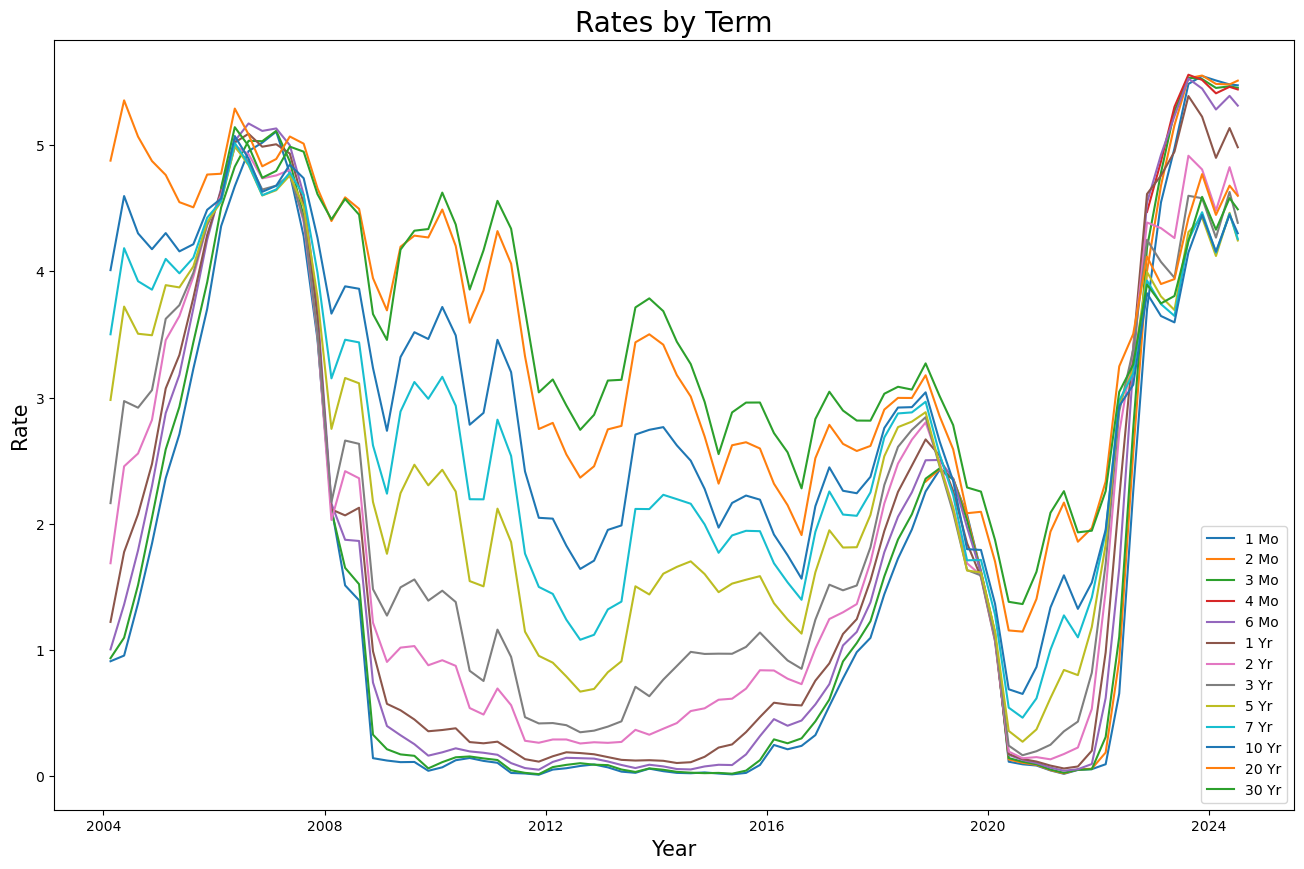

In [35]:
#Graphing Treasury data

# Adjusting the figure size
fig = plt.subplots(figsize=(16, 10))

#Creating plot
for col in ['1 Mo', '2 Mo', '3 Mo', '4 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr']:
    plt.plot(finalrates['Date'], finalrates[col])

# Adding a plot title and customizing its font size
plt.title('Rates by Term', fontsize=20)

# Adding axis labels and customizing their font size
plt.xlabel('Year', fontsize=15)
plt.ylabel('Rate', fontsize=15)

#Make a legend for colors
plt.gca().legend(('1 Mo', '2 Mo', '3 Mo', '4 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr'))

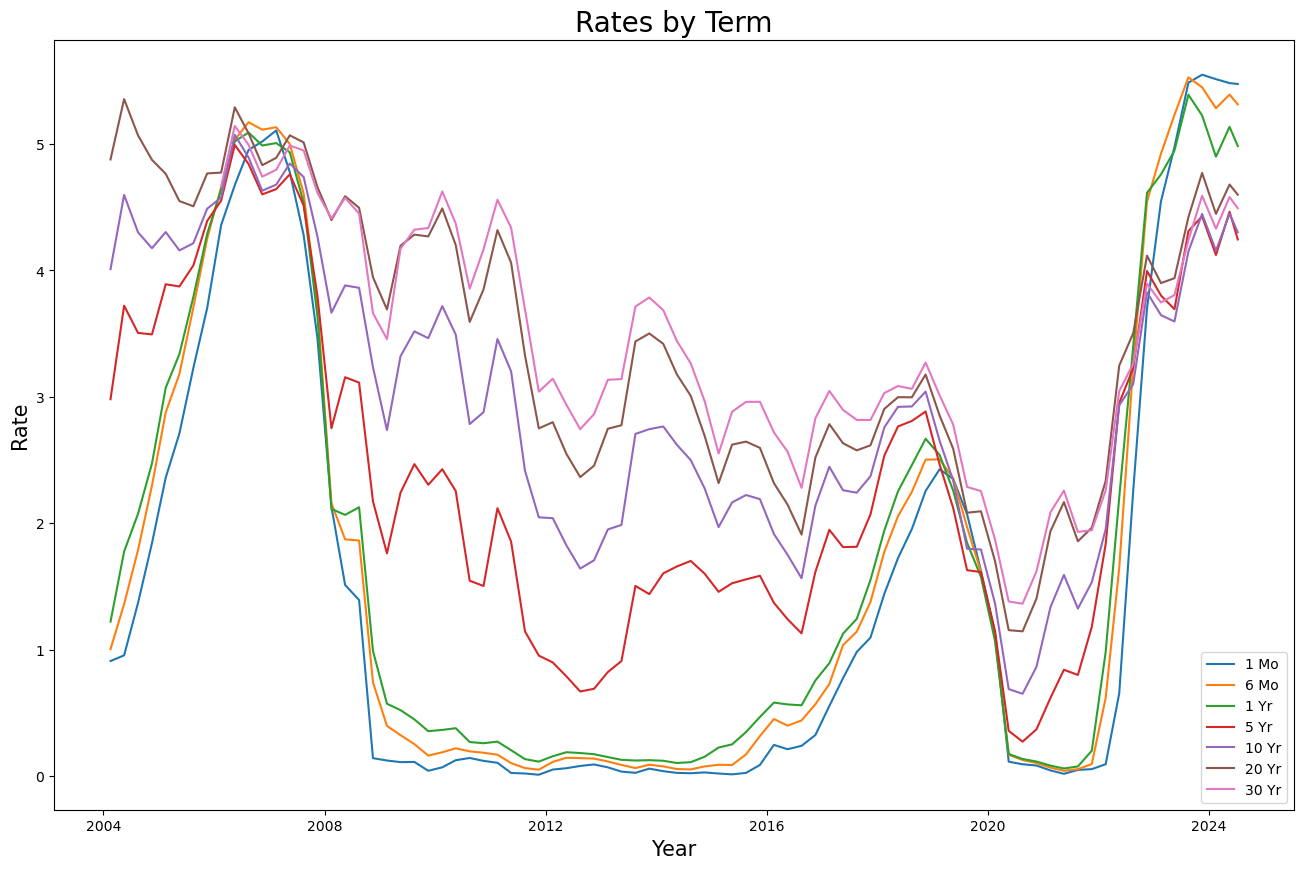

In [37]:
#Making smaller plot with fewer rates included

# Adjusting the figure size
fig = plt.subplots(figsize=(16, 10))

#Creating plot
for col in ['1 Mo', '6 Mo', '1 Yr', '5 Yr', '10 Yr', '20 Yr', '30 Yr']:
    plt.plot(finalrates['Date'], finalrates[col])

# Adding a plot title and customizing its font size
plt.title('Rates by Term over Time', fontsize=20)

# Adding axis labels and customizing their font size
plt.xlabel('Year', fontsize=15)
plt.ylabel('Rate', fontsize=15)

#Make a legend for colors
plt.gca().legend(('1 Mo', '6 Mo', '1 Yr', '5 Yr', '10 Yr', '20 Yr', '30 Yr')) 

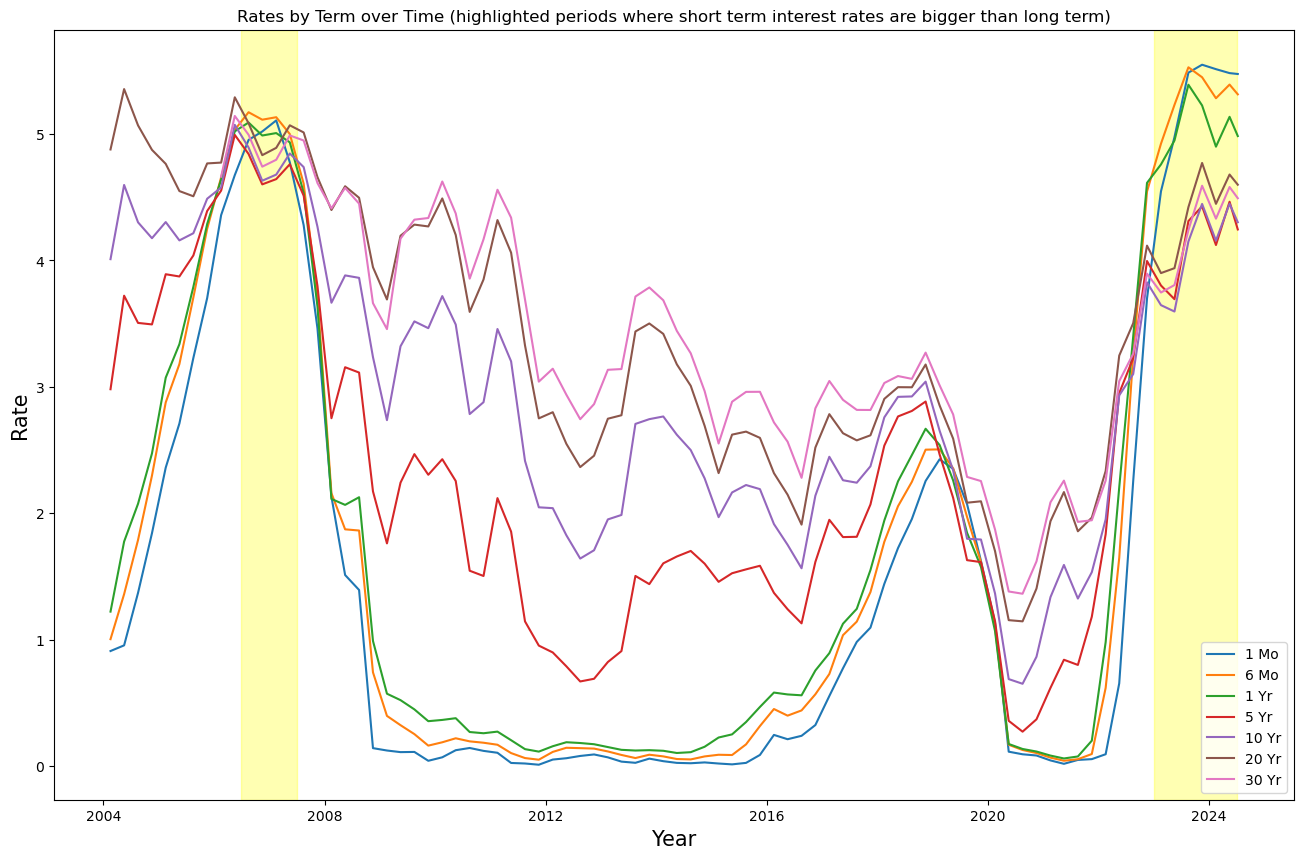

In [46]:
#Highlighting where the spread is negative

# Adjusting the figure size
fig = plt.subplots(figsize=(16, 10))

#Creating plot
for col in ['1 Mo', '6 Mo', '1 Yr', '5 Yr', '10 Yr', '20 Yr', '30 Yr']:
    plt.plot(finalrates['Date'], finalrates[col])

# Adding a plot title and customizing its font size
plt.title('Rates by Term over Time (highlighted periods where short term interest rates are bigger than long term)')

# Adding axis labels and customizing their font size
plt.xlabel('Year', fontsize=15)
plt.ylabel('Rate', fontsize=15)

#Make a legend for colors
plt.gca().legend(('1 Mo', '6 Mo', '1 Yr', '5 Yr', '10 Yr', '20 Yr', '30 Yr'), loc='lower right') 

# Highlighting the time period from 2006-6-30 to 2007-06-30 
plt.axvspan(datetime(2006, 6, 30), datetime(2007, 6, 30), color='yellow', alpha=0.3)

# Highlighting the time period from 2022-12-31 to 2024-07-1 
plt.axvspan(datetime(2022, 12, 31), datetime(2024, 7, 1), color='yellow', alpha=0.3)